In [31]:
import hazm
import nltk
import pandas
import re 
import pickle
import arabic_reshaper
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_excel('final_books.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2824 non-null   object
 1   date      2824 non-null   object
 2   content   2441 non-null   object
 3   category  2824 non-null   object
 4   author    2824 non-null   object
 5   comments  2824 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


In [ ]:
df.iloc[0]['content']

' تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی است. سمینار های تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است. در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها، خواهان تجربه و تلاش زیادی هستند. مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است. او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد. موعظه\u200cهای\xa0 و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند. این کتاب گزیده ای از سخنرانی های آقای جیکز ، یکی از بهترین سخنران های انگیزشی در دنیا است. امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود'

In [3]:
def remove_punctuations(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~،'''
    for char in text:
        if char in punctuations:
            text = text.replace(char, "")
    return text

In [4]:
import hazm

normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()
stop_words = hazm.stopwords_list()

tokens = []
lemmatized_tokens = []

for index, row in df.iterrows():
    content = row['content'] 
    norm_content = normalizer.normalize(str(content))
    norm_content_no_punctuations = remove_punctuations(norm_content)
    tokenized_sentences = hazm.sent_tokenize(norm_content_no_punctuations)
    content_tokenized_words = []
    for sentence in tokenized_sentences:
        try:
            tokenized_words = hazm.word_tokenize(sentence)
            filtered_words = [word for word in tokenized_words if word not in stop_words]
            content_tokenized_words.extend(filtered_words)
            for word in filtered_words:
                lemmatizedWord = lemmatizer.lemmatize(word)
                lemmatized_tokens.append((index, lemmatizedWord))
        except:
            print("error")  
    tokens.extend(content_tokenized_words)

In [5]:
def create_word_index(arr):
    word_index = {}
    for doc_id, word in arr:
        if word in word_index:
            word_index[word].append(doc_id)
        else:
            word_index[word] = [doc_id]
    return dict(sorted(word_index.items(), key=lambda x: len(x[1]), reverse=True))

In [6]:
word_index = create_word_index(lemmatized_tokens)

In [7]:
lemmatized_tokens = ''
tokens = ''
tokenized_words =''
filtered_words = ''
content_tokenized_words=''

In [8]:
first_key, first_value = next(iter(word_index.items()))
print(first_key, first_value[0:100])

کتاب [0, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 11, 13, 13, 13, 13, 13, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 19, 21, 21, 21, 21, 22, 24, 25, 25, 26, 27, 27, 27, 29, 30, 30, 30, 34, 35, 37, 37, 37, 38, 39, 40, 41, 43, 43, 43, 44, 44, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 48, 48, 49, 50]


In [9]:
def sort_dict_values(d):
    sorted_dict = {}
    for k in d:
        sorted_dict[k] = sorted(set(d[k]), key=d[k].count, reverse=True)
    return sorted_dict

sorted_word_index = sort_dict_values(word_index)


In [10]:
sorted_word_index = sort_dict_values(word_index)
first_key, first_value = next(iter(sorted_word_index.items()))
print(first_key, first_value[0:20])

کتاب [502, 512, 428, 960, 1583, 103, 112, 188, 544, 8, 2213, 417, 988, 1116, 1170, 16, 460, 659, 1390, 1512]


In [11]:
words_count = []
for i in range(2824):
    words_count.append(len(str(df.iloc[i]['content']).split()))

In [13]:
tf = []
for i in range(2824):
    keyword = []
    for key in word_index:
        if words_count[i] != 0:
            keyword.append((key,word_index[key].count(i)/ words_count[i]))
        else:
            keyword.append((key,0))
    tf.append((i, keyword))

In [14]:
import math
idf = {}
for key in sorted_word_index:
    logarithm = math.log(2824/len(sorted_word_index[key]))
    idf[key] = logarithm

idf

{'کتاب': 0.6966945414987435,
 '–': 2.5568378687966318,
 '«': 1.5760086157849056,
 '»': 1.5863357299407552,
 'ایران': 1.7700423285073714,
 'زبان': 1.852339828567997,
 'سال': 1.5291773161008064,
 'کار': 1.7017426979493966,
 'زندگی': 1.7742090012022174,
 'تاریخ': 2.0542653867873617,
 '؛': 2.252177459810433,
 'استفاده': 1.8234167890987467,
 '؟': 2.3775650948520357,
 'شد#شو': 1.7953068301668533,
 'قرار': 1.7783931077247914,
 'داستان': 2.354922618102276,
 'کشور': 2.1169639810029257,
 'آموزش': 2.1933369597874997,
 'داشت#دار': 1.9619733179259422,
 'کرد#کن': 1.959457593328695,
 'انسان': 2.2158098156395583,
 'توانست#توان': 1.9080386786909949,
 'نام': 2.085123375147267,
 'صورت': 1.9494575099941116,
 'زمان': 2.0031102234864315,
 'عنوان': 1.977202038627767,
 'داد#ده': 2.0004889900065574,
 'دست': 2.0324065929748625,
 'علم': 2.3255087328959827,
 'مختلف': 2.125826668260771,
 'برنامه': 2.730973841004147,
 'مجموعه': 2.235482581238263,
 'انجام': 2.2829491184771866,
 'جهان': 2.2829491184771866,
 'نوشت#نوی

# correct

In [15]:
word_index = []

In [16]:
tfidf = []
# i => (dcoument id, [(word, tf), (word, tf), ...])
count = 0
for i in tf:
    print(i[0]) 
    row = []
    # k => (word, tf_value)
    for k in i[1]:
        row.append((k[0], k[1]*idf[k[0]]))
    tfidf.append((i[0], row))
    if count == 1000:
        break



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
idf = ''
tf =''

# interface 

In [33]:
query = input("Enter your query: ")
query_words = query.split()

scores = []
#i => (document id, [(word, tfidf), (word, tfidf), ...])
for i in tfidf:
    score = 0
    for word in query_words:
        #i[0] => document id
        #j => (word, tfidf)
        for j in i[1]:
            #j[0] => word
            if(word == j[0]):
                score += j[1]
    scores.append((i[0], score))

scores.sort(key=lambda x: x[1], reverse=True)
print('result => ', scores[0:10])
scores = scores[0:5]


result =>  [(1742, 0.08460642894139073), (2259, 0.07207184912055968), (2326, 0.05805787845822863), (2261, 0.05804969236719683), (2213, 0.05719134295885208), (2312, 0.0568730237958158), (1873, 0.051992129962592795), (2729, 0.051607003073981), (887, 0.05097764937795684), (502, 0.04976389582133882)]


In [35]:
#rocchio algorithm for each result in scores get the user feedback and update the query
#scores => [(document id, score), (document id, score), ...]
#tfidf => [(document id, [(word, tfidf), (word, tfidf), ...]), (document id, [(word, tfidf), (word, tfidf), ...]), ...]

#get user feedback
user_feedback = []
for i in scores:
    print('document id: ', i[0])
    print('score: ', i[1])
    print('content: ', df.iloc[i[0]]['content'])
    print('title: ', df.iloc[i[0]]['title'])
    print('author: ', df.iloc[i[0]]['author'])
    print('-----------------------------------------------')
    user_feedback.append(input('Do you like this document? (y/n)'))
    print('-----------------------------------------------')


document id:  1742
score:  0.08460642894139073
content:  کتاب « لندن رؤیای من‌ و ‌تو » زحمت دوساله‌ی یک دانشجوی افغانستانی در لندن است. نویسنده در این کتاب کوشیده است درضمن خاطرات دانشجویی مکان های دیدنی لندن را با شرح مختصر و ویژه‌ به معرفی بگیرد. ‌این سفرنامه‌ تصویری واقعی از دانشجویان افغانستان را که در انگلستان دانش فرا می‌گیرند نشان می‌دهد؛ گذشته از این‌که مردم افغانستان در مورد دانشجویانی که برای تحصیل به شهر‌‌های اروپا فرستاده می‌شوند؛ چه گمانه‌زنی‌هایی که نیست می‌کنند. ‌کتاب برای کسانی که ‌به لندن سفر می‌کنند ‌یا هم برای تحصیل به آن‌جا می‌روند، می‌تواند ‌‌راهنمای خوبی باشد.
title:   لندن رویای من و تو
author:            عبدالرحمان رحمانی  
-----------------------------------------------
-----------------------------------------------
document id:  2259
score:  0.07207184912055968
content:   در این کتاب شما آموزش کاربا CMS نیوک ۸٫۳ را به زبانی ساده و کاربردی خواهید آموخت این کتاب برای سطح مبتدی است. در این کتاب شما خواهید آموخت
title:   آموزش کار با php nuke ( نیوک ) برای مبتدیا

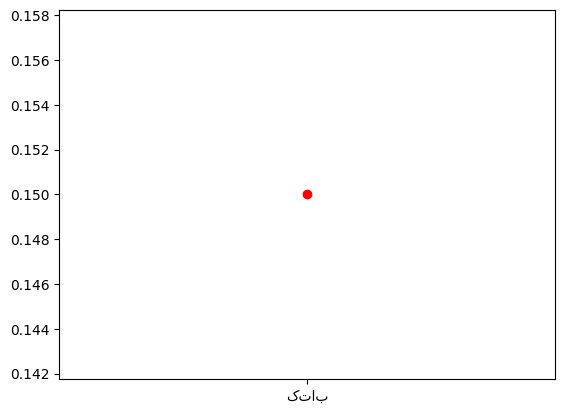

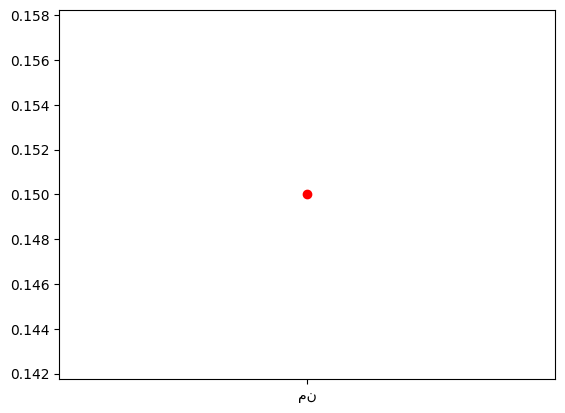

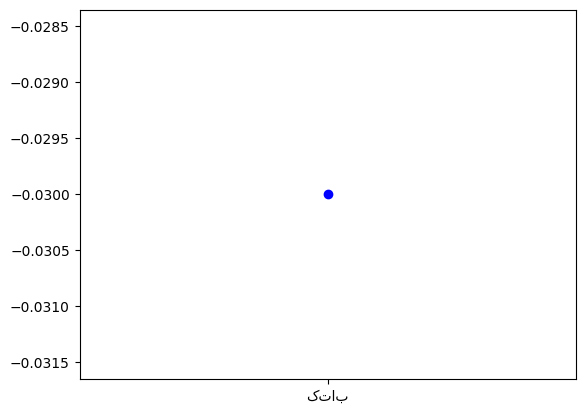

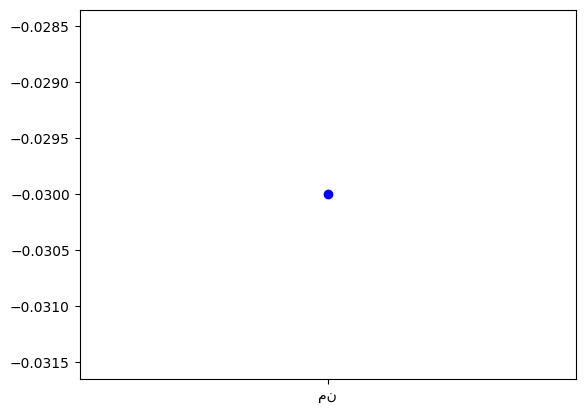

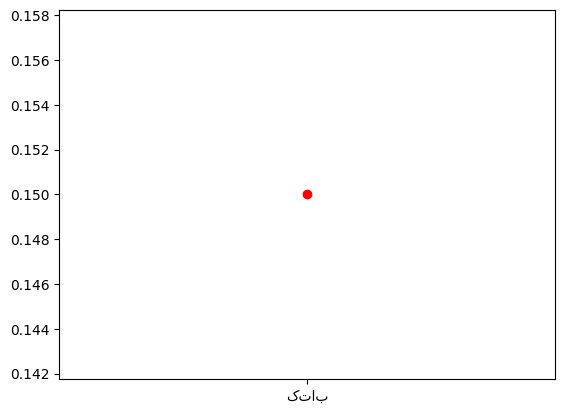

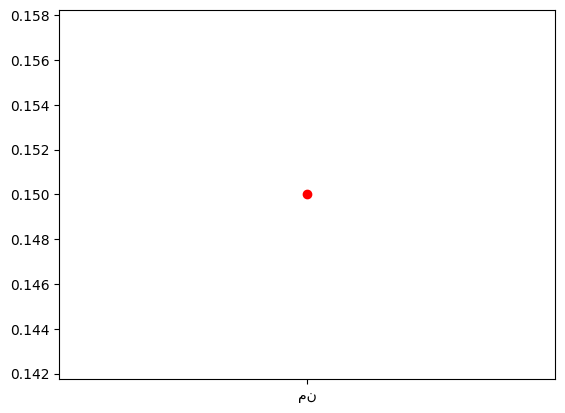

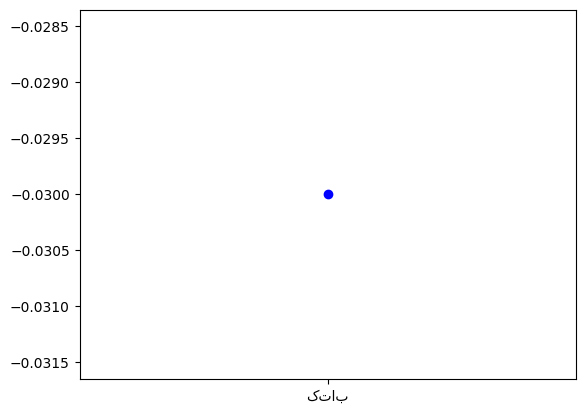

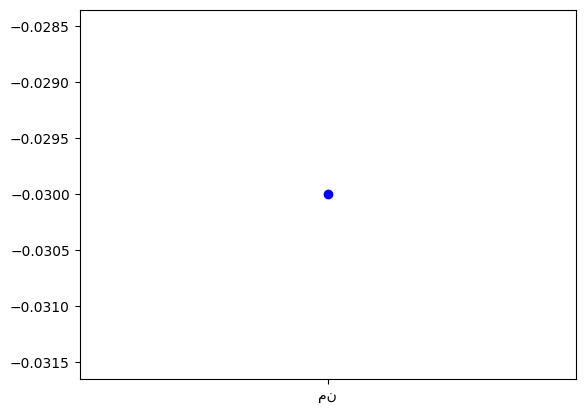

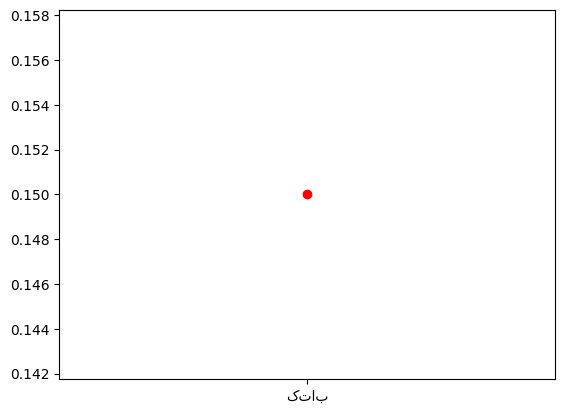

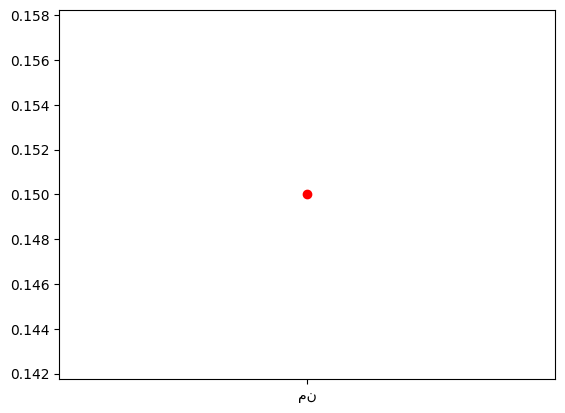

In [37]:
#update query
alpha = 1
beta = 0.75
gamma = 0.15
new_query = []
for word in query_words:
    new_query.append((word, alpha/len(query_words)))

for i in range(len(scores)):
    if user_feedback[i] == 'y':
        for word in query_words:
            for j in tfidf[scores[i][0]][1]:
                if word == j[0]:
                    new_query.append((word, beta/len(scores)))
                    #plot new query
                    plt.scatter(word, beta/len(scores), c='red')
                    plt.show()

    else:
        for word in query_words:
            for j in tfidf[scores[i][0]][1]:
                if word == j[0]:
                    new_query.append((word, -gamma/len(scores)))
                    #plot new query
                    plt.scatter(word, -gamma/len(scores), c='blue')
                    plt.show()

In [38]:
new_query = dict(new_query)
new_query = sorted(new_query.items(), key=lambda x: x[1], reverse=True)
print('new query => ', new_query[0:10])

new query =>  [('فارسی', 0.25), ('زیبای', 0.25), ('کتاب', 0.15), ('من', 0.15)]


In [17]:
# # Save the word_dictionaries object to a file
# with open('index_dict.pkl', 'wb') as f:
#     pickle.dump(sorted_word_index, f)